# Discretization and assembly


## The weak form

Our usual formulation of BVPs is called the *strong* form because it assumes a lot of continuity in a solution. E.g.: if the equation contains $\nabla^2 u$, the solution assumes that that derivative exists!

The MWR leads to the *weak form* which has less requirements on the solution, amoungst other benefits. Essentially, all we have to do is multiply through by our test function $v$ and integrate. Something *very* useful happens to our divergence-of-flux terms, which are prevelant in conservation equations.

As an example, consider a time dependant heat balance (temperature = $u$), using the backward Euler time marching scheme.
$$ \begin{align}
\frac{\partial u}{\partial t} &= -\nabla \cdot \vec{J} \\
\frac{u - u^{t-1}}{\Delta t} &= -\nabla \cdot \vec{J} \\
u + \Delta t [\nabla \cdot \vec{J}] &= u^{t-1}
\end{align}$$


To get to the weak form, multiply through by the test funciton $v$ and integrate:  

$$ 0 = \int_{\Omega} u v - \int_{\Omega} u^{t-1}v \  + \Delta t \int_{\Omega}v \nabla \cdot \vec{J} $$

Examining the divergence-of-flux term, we see that we can apply integration by parts followed by the Divergence Theorem:
$$ \begin{align}
\int_\Omega v \nabla \cdot \vec{J}  &= -\int_\Omega \nabla v \cdot \vec{J}  + \int_{\Omega} \nabla \cdot \big[v\vec{J}\big]  \\
&=-\int_\Omega \nabla v \cdot \vec{J}  + \int_{\partial \Omega} v \ \vec{J} \cdot \hat{n} \\
&=\int_\Omega \lambda \nabla v \nabla u  + \int_{\partial \Omega} v \ J_n    
\end{align}$$

Where we have defined the outward normal boundary flux, $J_n = \vec{J} \cdot \hat{n}$

The weak form is remarkable since we:

* replaced a second derivative with the product of two first derivatives.
* no longer require our solution to *have* a second derivative (it can be less smooth and satisfy the equation in an average sense which is *weaker* than the *strong* form)!
* incorporated boundary fluxes directly into the residual calculation (through the surface integral)
* do not require anything from $\lambda$, which means this is still valid for $\lambda(u,x,t...)$, however it is now outside of the gradient!
* We also provided an avenue for directly integrating surface *phenomena* into our model through the surface integral!)




#### Boundary conditions / terms

The term $\int_{\partial \Omega} v \ \vec{J} \cdot \hat{n}$ is a *boundary integral* of the *normal flux*, $\vec{J}_n = \vec{J} \cdot \hat{n}$.

Typically, we will have some knowledge of the boundary conditions either:
* Neumann (flux) boundary condition in which case we have the quantity $\vec{J}_n$ to insert directly.
* Insulation (zero flux) for which $\vec{J}_n= 0$ and the term vanishes.
* Dirichlet (value) boundary condition which we would just insert directly into the applicable unknown, e.g.: $u_0 = 0$ for a boundary $u(0) = 0$. In this case, there is still a flux at that boundary but it is determined by the dirichlet condition.

Some software will opt to implement Dirichlet conditions as a *weak constraint* which is a Lagrange multiplier formulation in which the lagrange multiple assume the value of the *reaction force* necesssary to affect that constraint.

## Discretization

We are now in a position to discretize the weak equation ,

$$ \begin{align}
\int_{\Omega} u v + \Delta t \int_\Omega \lambda \nabla v \nabla u    &= \int_{\Omega} u^{t-1}v - \Delta t \int_{\partial \Omega} v \ J_n\\
\end{align}$$

into a form we are able to solve, which will (finally) give us an idea of what the shape functions are.

### Small support for shape functions

The shape functions are generally designed to be non-zero only inside their element. This has the effect of limiting products, $\int \phi_i \phi_j$ and  $\int \nabla \phi_i \nabla \phi_j$ to be zero for almost all combination of $i$ and $j$ except for cases where the nodes $i$ and $j$ are within the same element!

## Assembly

The matrix assembly stage involves transforming the weak form into a matrix equation for the unknowns, $u_i$ such that the approximate solution can be assembled as $u_h = \sum u_i \phi_i$.

Consider the term, $\int_{\Omega} uv$, recalling $u_h = \sum u_i \phi_i$ and $v = \sum_j \phi_j$. Since integration is a linear operator, we have,

$$\begin{align}
\int_{\Omega} uv  &= \sum_i u_i \int_{\Omega} \phi_i \phi_j \\
&=  \sum_i u_i M_{ij} \\
\end{align}$$
where $M_{ij}$ is called the *Mass* matrix.

Similarly,

$$\begin{align} \int_\Omega \lambda \nabla v \nabla u &= \sum_i \lambda(u_i) u_i \int_{\Omega} \nabla \phi_i \nabla \phi_j \\
&=  \sum_i \lambda(u_i) u_i K_{ij}
\end{align}$$
which is called the *stiffness matrix*.

The term
$$\begin{align}
\int_{\Omega} u^{t-1} v &= \sum_i u^{t-1}_i \int_{\Omega} \phi_i \phi_j \\
&= \sum_i u_i^{t-1} M_{ij} = b_j
\end{align}$$
but can also be calculated directly since $u_i^{t-1}$ is known.
                               



Finally we can assemble our equation:

$$ \begin{align}
\int_{\Omega} u v + \Delta t \int_\Omega \lambda \nabla v \nabla u   &= \int_{\Omega} u^{t-1}v - \Delta t \int_{\partial \Omega} v \ J_n\\
\sum_i u_i M_{ij} + \Delta t \lambda u_i K_{ij}  &= b_j - {J_n}_j \\
\vec{u}_h M + \Delta t \lambda \vec{u}_h K  &= \vec{b} - \vec{J_n}
\end{align}$$

The elements of the matrix are can be calculated for a reference element and then simply scaled according to the transformation of the template to the mesh. The integration itself can be analytic, or Gaussian Quadrature (for which Gauss Points would be obtained on the reference element).

### Summary of FEM Matricies

| **Weak Form Term**  ............                                  | **Matrix Form (FEM)**                                                                                     | **Description**                                                                 |
|-------------------------------------------------------|-----------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------|
| $\int_\Omega \phi_i \phi_j \, d\Omega$               | $\mathbf{M}_{ij} $                                                  | Mass matrix. Often used in time-dependent problems.                            |
| $\int_\Omega \nabla \phi_i \cdot \nabla \phi_j \, d\Omega$ | $\mathbf{K}_{ij} $                               | Stiffness matrix. Used in problems like Poisson or elasticity equations.       |
| $\int_\Omega \phi_i f \, d\Omega$                    | $\mathbf{F}_i $                                                          | Load vector. Represents source terms in the governing equation.                |
| $\int_{\partial \Omega} \phi_i g \, d\partial \Omega$         | $\mathbf{F}_i^{\text{bc}} $                                   | Boundary load vector (from Neumann boundary conditions).                       |


## Solution

We now arrive at a matrix equation for the unknows $u_i$, which is mearly a system of equations as we've spoken about beforehand.

### Linear PDE

If the PDE is linear, we can solve it with a linear solver which is sparse due to the small support requirement of the elements. The matrix will not in general be banded however, due to the irregular conectivity of the mesh verticies.

#### Example: 1D heat equation

Solve the 1D heat balance equation with $\lambda = 1$ for $x$ from 0 to 10 subject to $J(0)$ = 1 and $T(10) = 0$. Initial condition is $T(x,t=0) = 0$.

The mass matrix is:
$$M_{ij} = \int_{x_1}^{x_2} \phi_i(x) \phi_j(x) dx$$

with

$$\begin{align}
\phi_1(x) &= \frac{x_2-x}{x_2-x_1} \\
\phi_2(x) &= \frac{x-x_1}{x_2-x_1} \\
\end{align}$$

we (Mathematica) get:
$$
M = \frac{[x_2-x_1]}{6} \begin{bmatrix}
2 & 1 \\
1 & 2
\end{bmatrix}
$$

The stiffness matrix needs
$$\begin{align}
\nabla \phi_1(x) &= \frac{-1}{x_2-x_1} \\
\nabla \phi_2(x) &= \frac{1}{x_2-x_1} \\
\end{align}$$

and
$$ \begin{align}
K_{ij} &= \lambda \int_{x_1}^{x_2} \nabla \phi_i(x) \nabla \phi_j(x) dx\\
 &= \frac{\lambda}{h} \begin{bmatrix}
1 & -1 \\
-1 & 1
\end{bmatrix}
\end{align}$$

These *blocks* belong to each element, so we have to build the full matrix by *summing them*. Note this implies an overlap at common verticies between elements!

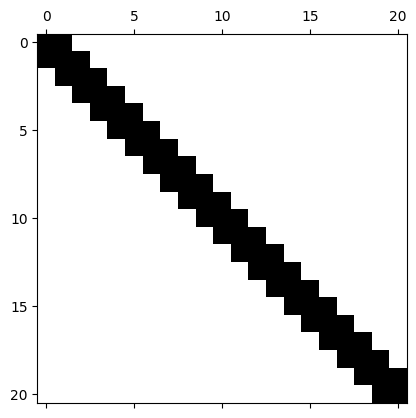

interactive(children=(FloatSlider(value=0.0, description='Final Time:', step=1.0), Output()), _dom_classes=('w…

In [3]:
# prompt: Assemble a a linear system for the heat equation above using the finite element method with Lagrange order 1 elements, using implicit Euler time stepping and a mesh resolution that is concentrated near the left boundary.

import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from ipywidgets import interact, FloatSlider

# Define the domain and parameters
L = 10.0  # Length of the domain
n_elements = 20  # Number of elements
dt = 0.1  # Time step
t_final = 1.0  # Final time

# Create a mesh with concentration near the left boundary
x_nodes = np.concatenate((np.linspace(0, 2, int(n_elements / 2) + 1),
                          np.linspace(2 + (L - 2) / (n_elements / 2 - 1), L, int(n_elements / 2))))

# Define the element stiffness and mass matrices for linear elements
def element_stiffness(x1, x2):
    return np.array([[1, -1], [-1, 1]]) / (x2 - x1)

def element_mass(x1, x2):
    return np.array([[2, 1], [1, 2]]) * (x2 - x1) / 6

# Assemble the global stiffness and mass matrices
K = np.zeros((len(x_nodes), len(x_nodes)))
M = np.zeros((len(x_nodes), len(x_nodes)))

for i in range(len(x_nodes) - 1):
    x1 = x_nodes[i]
    x2 = x_nodes[i + 1]
    Ke = element_stiffness(x1, x2)
    Me = element_mass(x1, x2)
    K[i:i + 2, i:i + 2] += Ke
    M[i:i + 2, i:i + 2] += Me

plt.spy(M)
plt.show()

# Apply boundary conditions
# Dirichlet BC at x = L (T(L) = 0)
K[-1, :] = 0
K[-1, -1] = 1
M[-1, :] = 0
M[-1, -1] = 1

# Neumann BC at x = 0 (J(0) = 1)
# We'll implement this in the right-hand side vector later.

# Function to solve and plot for a given time
def solve_and_plot(t_final):
    T = np.zeros(len(x_nodes))
    t = 0.0
    while t < t_final:
        b = M @ T
        b[0] += dt * 1
        T = np.linalg.solve(M + dt * K, b)
        t += dt

    plt.plot(x_nodes, T)
    plt.xlabel('x')
    plt.ylim(-.5, 10)  # Set the y-axis limits to [0, 1]
    plt.ylabel('Temperature')
    plt.title('Temperature Profile at t = {}'.format(t_final))
    plt.show()


# Create a slider for the final time
time_slider = FloatSlider(value=0.0, min=0.0, max=100.0, step=1, description='Final Time:')

# Use interact to link the slider to the function
interact(solve_and_plot, t_final=time_slider);


Note that we built the $M$ and $K$ matricies once, outside the time loop and reuse them for each time step! Even if we had adaptive time stepping, the matrix wouldn't change!

### Nonlinear case

If the PDE is nonlinear, we simply have to use a root finder. Note that in this case we are looking for the parameters $u_i$ directly - the shape functions are unaffected and therefore only the coefficients of the matrix *blocks* are altered. This brings up the concept of *sparsity patterns* which can help reduce the overhead of sparse matrix representaitons.

Since modern finite element software needs to construct the weak form, it is usually equiped with symbolic logic capabilities and therefore able to calculate the Jacobian for use in the root finding algorithm.

#### Example: 1D nonlinear heat equation

Repeat the above exercise with $\lambda = 1 + u/10$

In [6]:
# prompt: Solve the heat transport problem again but this time with \lambda = 1+T/10

import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from ipywidgets import interact, FloatSlider

# Define the domain and parameters
L = 10.0  # Length of the domain
n_elements = 20  # Number of elements
dt = 0.1  # Time step
t_final = 1.0  # Final time

# Create a mesh with concentration near the left boundary
x_nodes = np.concatenate((np.linspace(0, 2, int(n_elements / 2) + 1),
                          np.linspace(2 + (L - 2) / (n_elements / 2 - 1), L, int(n_elements / 2))))

# Define the element stiffness and mass matrices for linear elements
def element_stiffness(x1, x2, T):
    lambda_val = 1 + T / 10
    return np.array([[1, -1], [-1, 1]]) * lambda_val / (x2 - x1)


def element_mass(x1, x2):
    return np.array([[2, 1], [1, 2]]) * (x2 - x1) / 6

# Assemble the global stiffness and mass matrices
def assemble_matrices(T):
    K = np.zeros((len(x_nodes), len(x_nodes)))
    M = np.zeros((len(x_nodes), len(x_nodes)))

    for i in range(len(x_nodes) - 1):
        x1 = x_nodes[i]
        x2 = x_nodes[i + 1]
        Ke = element_stiffness(x1, x2, T[i:i+2].mean())
        Me = element_mass(x1, x2)
        K[i:i + 2, i:i + 2] += Ke
        M[i:i + 2, i:i + 2] += Me

    return K, M


# Apply boundary conditions
def apply_boundary_conditions(K, M):
    # Dirichlet BC at x = L (T(L) = 0)
    K[-1, :] = 0
    K[-1, -1] = 1
    M[-1, :] = 0
    M[-1, -1] = 1
    return K, M

# Function to solve and plot for a given time
def solve_and_plot(t_final):
    T = np.zeros(len(x_nodes))
    t = 0.0
    while t < t_final:
        K, M = assemble_matrices(T)
        K, M = apply_boundary_conditions(K, M)
        b = M @ T
        b[0] += dt * 1
        T = np.linalg.solve(M + dt * K, b)
        t += dt

    plt.plot(x_nodes, T)
    plt.xlabel('x')
    plt.ylim(-.5, 10)  # Set the y-axis limits to [0, 1]
    plt.ylabel('Temperature')
    plt.title('Temperature Profile at t = {}'.format(t_final))
    plt.show()


# Create a slider for the final time
time_slider = FloatSlider(value=0.0, min=0.0, max=100.0, step=1, description='Final Time:')

# Use interact to link the slider to the function
interact(solve_and_plot, t_final=time_slider);

interactive(children=(FloatSlider(value=0.0, description='Final Time:', step=1.0), Output()), _dom_classes=('w…

Hmmmm... something is funny in that code!

In [5]:
# prompt: Solve the heat transport problem again but this time with \lambda = 1+T/10 using a root finder

import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.optimize import root
from ipywidgets import interact, FloatSlider


# Define the domain and parameters
L = 10.0  # Length of the domain
n_elements = 20  # Number of elements
dt = 0.1  # Time step
t_final = 1.0  # Final time

# Create a mesh with concentration near the left boundary
x_nodes = np.concatenate((np.linspace(0, 2, int(n_elements / 2) + 1),
                          np.linspace(2 + (L - 2) / (n_elements / 2 - 1), L, int(n_elements / 2))))

# Define the element stiffness and mass matrices for linear elements
def element_stiffness(x1, x2, lambda_val):
    return np.array([[1, -1], [-1, 1]]) * lambda_val / (x2 - x1)

def element_mass(x1, x2):
    return np.array([[2, 1], [1, 2]]) * (x2 - x1) / 6

# Assemble the global stiffness and mass matrices
M = np.zeros((len(x_nodes), len(x_nodes)))

for i in range(len(x_nodes) - 1):
    x1 = x_nodes[i]
    x2 = x_nodes[i + 1]
    Me = element_mass(x1, x2)
    M[i:i + 2, i:i + 2] += Me

# Apply boundary conditions
# Dirichlet BC at x = L (T(L) = 0)
M[-1, :] = 0
M[-1, -1] = 1

# Neumann BC at x = 0 (J(0) = 1)
# We'll implement this in the right-hand side vector later.

# Function to solve for T at the next time step using a root finder
def solve_for_next_T(T_prev):
    def residual(T):
        K = np.zeros((len(x_nodes), len(x_nodes)))
        for i in range(len(x_nodes) - 1):
            x1 = x_nodes[i]
            x2 = x_nodes[i + 1]
            lambda_val = 1 + T[i] / 10  # Update lambda based on T
            Ke = element_stiffness(x1, x2, lambda_val)
            K[i:i + 2, i:i + 2] += Ke

        b = M @ T_prev
        b[0] += dt * 1
        b[-1] = 0
        return (M @ T) + dt * (K @ T) - b

    sol = root(residual, T_prev)
    return sol.x

# Function to solve and plot for a given time
def solve_and_plot(t_final):
    T = np.zeros(len(x_nodes))
    t = 0.0
    while t < t_final:
        T = solve_for_next_T(T)
        t += dt

    plt.plot(x_nodes, T)
    plt.xlabel('x')
    plt.ylim(-.5, 10)
    plt.ylabel('Temperature')
    plt.title('Temperature Profile at t = {}'.format(t_final))
    plt.show()


# Create a slider for the final time
time_slider = FloatSlider(value=0.0, min=0.0, max=100.0, step=1, description='Final Time:')

# Use interact to link the slider to the function
interact(solve_and_plot, t_final=time_slider);

interactive(children=(FloatSlider(value=0.0, description='Final Time:', step=1.0), Output()), _dom_classes=('w…